# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.195939e+01     1.403197e+01
 * time: 0.002856016159057617
     1     6.268796e+01     7.805210e+00
 * time: 0.00828695297241211
     2     5.532037e+01     1.050254e+01
 * time: 0.020739078521728516
     3     4.023927e+01     7.850892e+00
 * time: 0.12122201919555664
     4     2.899062e+01     6.999855e+00
 * time: 0.13868498802185059
     5     2.165553e+01     5.431782e+00
 * time: 0.15404009819030762
     6     1.797159e+01     5.744320e+00
 * time: 0.16690611839294434
     7     8.554934e+00     1.992015e+00
 * time: 0.17981815338134766
     8     7.311377e+00     2.288292e+00
 * time: 0.19260001182556152
     9     6.865875e+00     1.253516e+00
 * time: 0.20545506477355957
    10     6.397035e+00     1.433695e+00
 * time: 0.21937203407287598
    11     6.255528e+00     1.356572e+00
 * time: 0.23033404350280762
    12     6.174473e+00     1.054860e+00
 * time: 0.27944016456604004
    13     6.146020e+00     1.299526e+00
 * tim

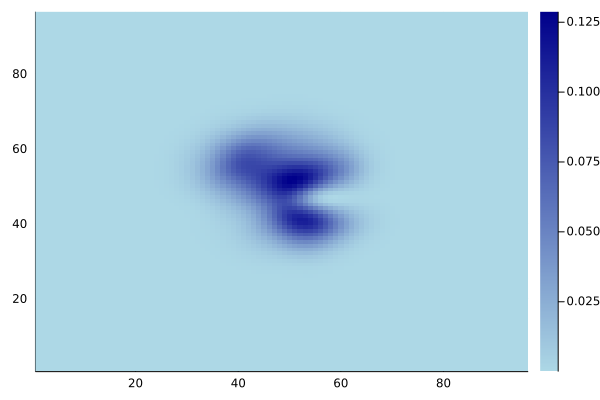

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))